<h1> DSCI100: Wine Quality Data Set Report</h1>

<h2>Alexandria Ahluwalia, Daniel Alimohd</h2>

<h3> Introduction </h3>

`Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and describe the dataset that was used to answer the question`

What makes a good wine? What separates an okay glass of wine from a great glass of wine? Many will answer these questions with a certain growing region, winery, or grape variety. But we would like to take this analysis further and see what top chemical factors are responsible for differentiating the quality of wine. We will perform our analysis by using the wine quality data set. This data set contains observations from a variety of Red and White Vinho Verde (wine only from a special region in Portugal). Each separate wine observation contains its perceived “quality” from wine experts and information on the content of alcohol, sugar, acidity, density, citric acid, sulfur dioxide, pH, and sulphates. The quality in the data set is measured on a scale from 0 to 10, but only quality ratings from 3 to 9 appear in the data set. Through the analysis of this information, we hope to find trends for which chemical factors have the most significant impact on wine quality and what makes both the red and white Vinho Verde wines good.



<img src="https://images.immediate.co.uk/volatile/sites/2/2019/02/Wine-header-4e686a2.jpg?quality=45&resize=960,413"  width="400">

<h3>Methods & Results</h3>

`describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.`

`your report should include code which:`
* loads data from the original source on the web 
* wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned classification or clustering analysis
* performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification, regression or clustering analysis 
* creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification or clustering analysis
* performs either a classification, regression or clustering analysis
* creates a visualization of the classification, regression  or clustering analysis 

`note: all tables and figure should have a figure/table number and a legend`

<h3>Expected outcomes and significance</h3>

`Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?`

In [1]:
suppressWarnings(library(tidyverse))
suppressWarnings(library(testthat))
suppressWarnings(library(digest))
suppressWarnings(library(repr))
suppressWarnings(library(caret))
suppressWarnings(install.packages("GGally"))
suppressWarnings(library(GGally))

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

also installing the dependencies ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
# reading in our data
red_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                    delim=";")
white_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                    delim=";")

# eliminating whitespace in column names
names(red_wine) <- gsub(" ","_", names(red_wine))
names(white_wine) <- gsub(" ","_", names(white_wine))


# combining our two wine data sets
wine <- bind_rows(list(white = white_wine , red = red_wine), .id = "type")

head(wine)
tail(wine)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col                  expected               actual file                 expected   <int> <chr>                <chr>                  <chr>  <chr>                actual 1  1296 total sulfur dioxide no trailing characters .5     'https://archive.ic… file 2  1297 total sulfur dioxide no trailing characters .5     'https://archive.ic…
”Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),

type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
white,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
white,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
red,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
red,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
red,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
red,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
red,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
red,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [3]:
quality_distribution <- ggplot(wine, aes(x = quality)) +
    xlab("Count") +
    ylab("Quality") +
    geom_bar(stat="count", aes(fill = type)) + scale_fill_manual(values=c("#B42A0D", "#DBF47C")) +
    geom_text(stat='count', aes(label=..count..), vjust=-(1/2))
    

# src:https://stackoverflow.com/questions/26553526/how-to-add-frequency-count-labels-to-the-bars-in-a-bar-graph-using-ggplot2/26556180

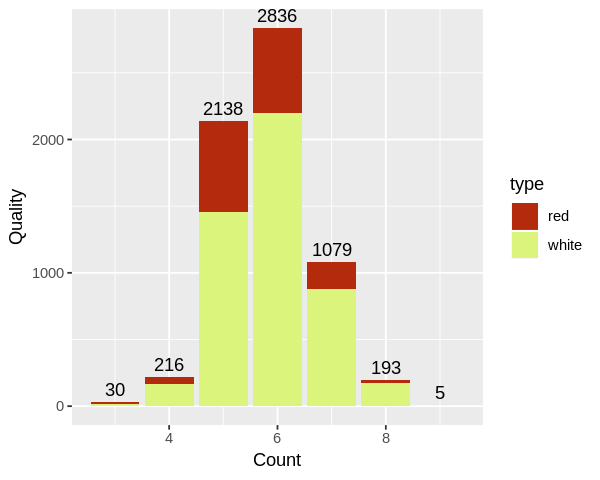

In [4]:
options(repr.plot.width=5,repr.plot.height=4)
quality_distribution

In [5]:
wine_explore <- select(wine, -type)
glimpse(wine)

# Should type be included in this ggpairs plot? Right now it's selected out using columns
# Or should we be treating red and white the same and ignore type
ggpair_plot <- wine %>%
            ggpairs(mapping = aes(color = type, alpha=1/10), columns = 2:13)

correlations <- wine %>%
                ggcorr(label = TRUE, label_round = 2, columns = 2:13)

# TODO: map correlations color onto ggpair plot

# src: https://stackoverflow.com/questions/45873483/ggpairs-plot-with-heatmap-of-correlation-values

Observations: 6,497
Variables: 13
$ type                 <chr> "white", "white", "white", "white", "white", "...
$ fixed_acidity        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8...
$ volatile_acidity     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27...
$ citric_acid          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36...
$ residual_sugar       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20....
$ chlorides            <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.04...
$ free_sulfur_dioxide  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17...
$ total_sulfur_dioxide <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129...
$ density              <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951...
$ pH                   <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00...
$ sulphates            <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45...
$ alcohol              <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5,...
$ quality         

Warning message in ggcorr(., label = TRUE, label_round = 2, columns = 2:13):
“data in column(s) 'type' are not numeric and were ignored”Warning message:
“Ignoring unknown parameters: columns”

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning

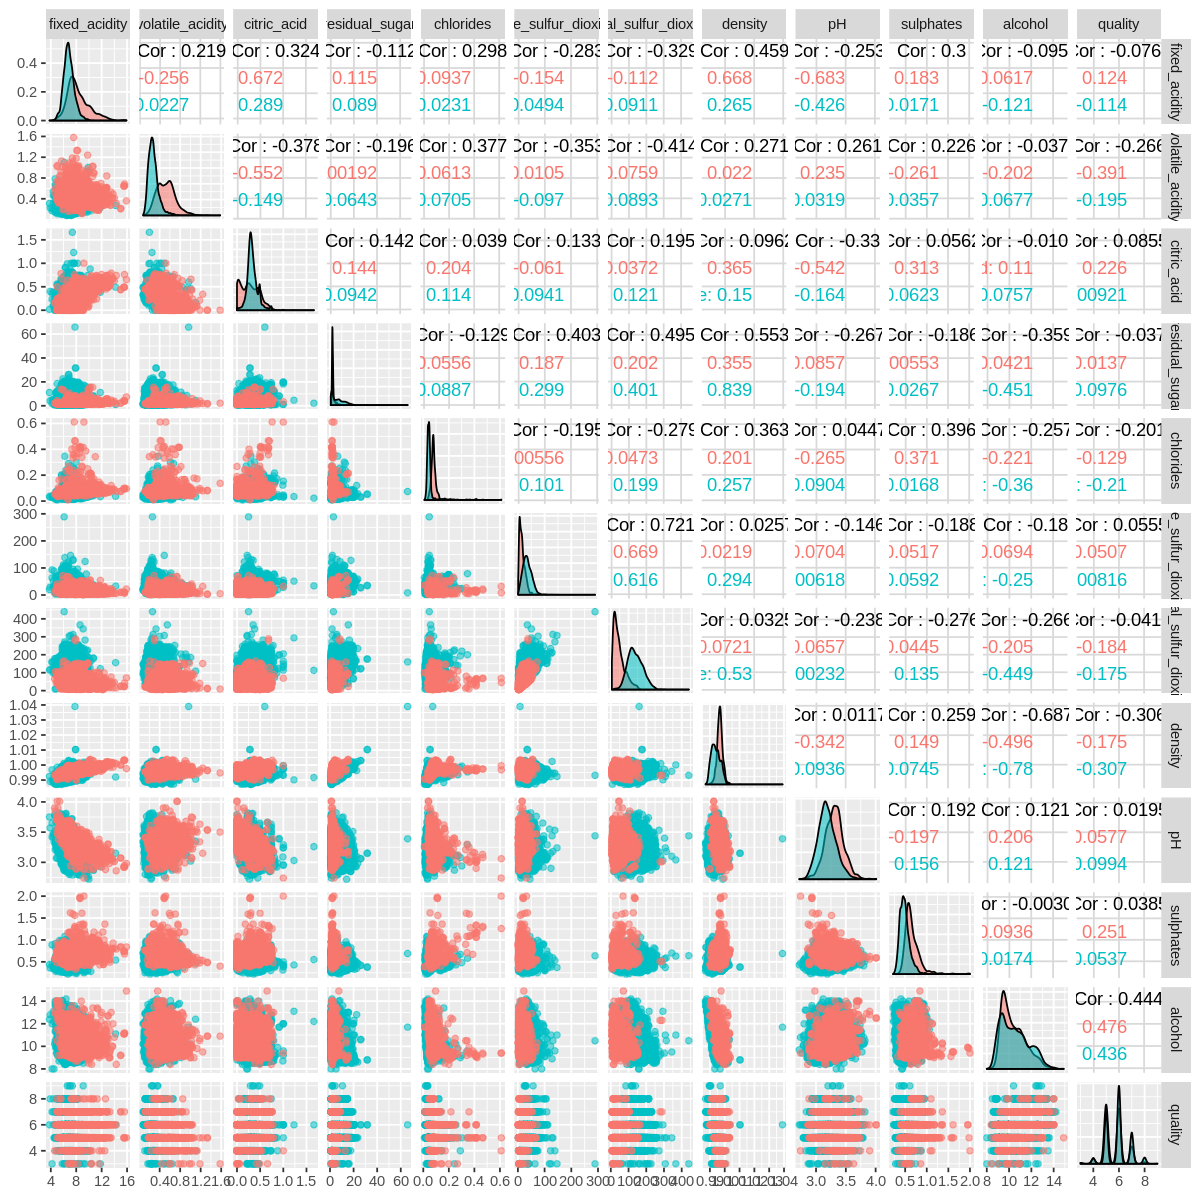

In [6]:
options(repr.plot.width=10,repr.plot.height=10)

ggpair_plot

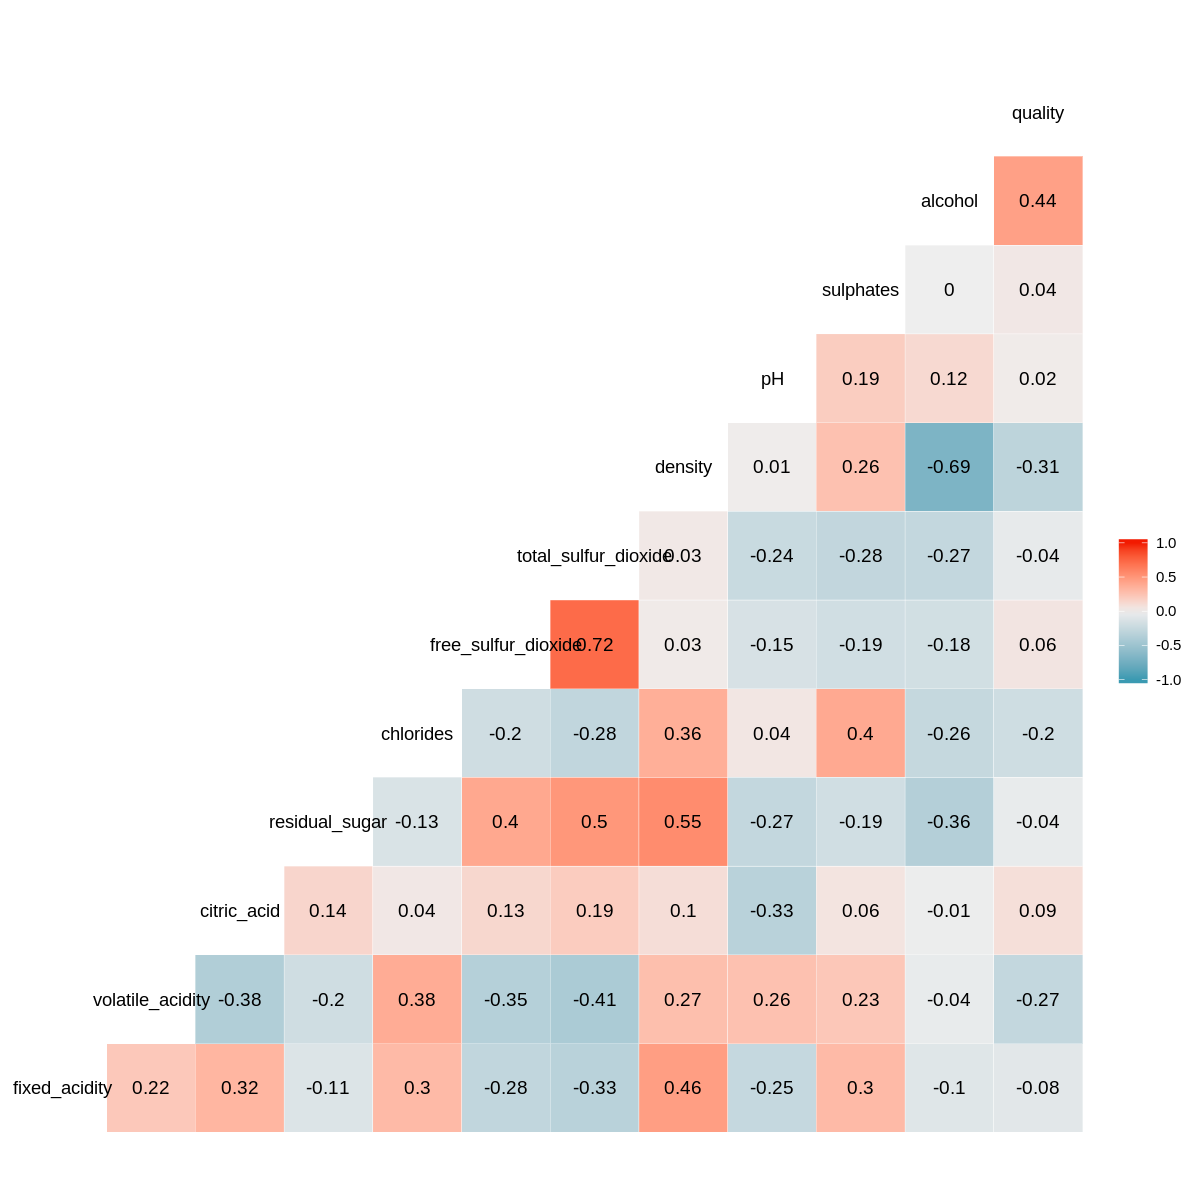

In [7]:
options(repr.plot.width=10,repr.plot.height=10)
correlations 

Warning message in ggcorr(., label_round = 2, columns = 2:13, geom = "circle", min_size = 0, :
“data in column(s) 'type' are not numeric and were ignored”Warning message:
“Ignoring unknown parameters: columns”

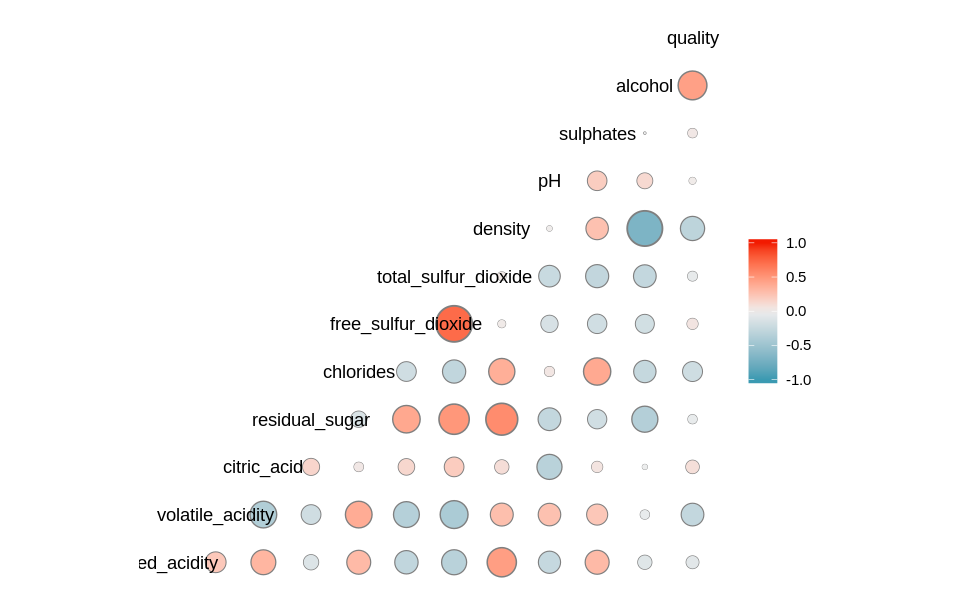

In [8]:
options(repr.plot.width=8,repr.plot.height=5)
correlations2 <- wine %>%
                ggcorr(label_round = 2, columns = 2:13, geom = "circle", min_size = 0, max_size = 10)
correlations2

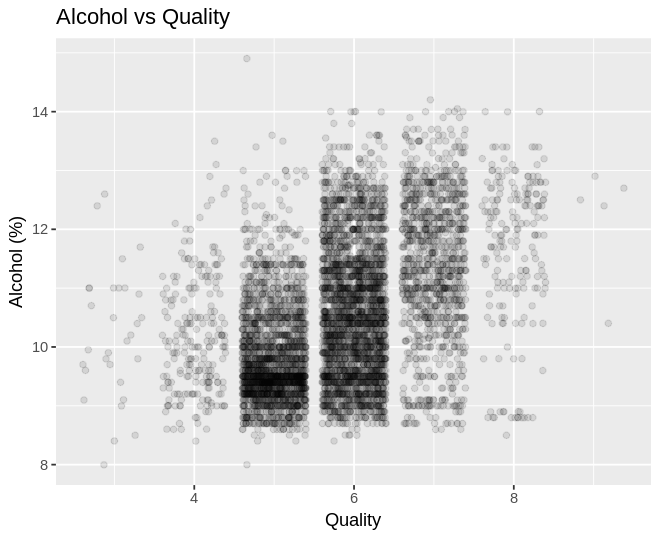

In [9]:
# TODO: Will probably plot all the variables vs quality here and then compare the RMSE and see
# if our exploratory predicted most important variables have a low RMSE, comfirming/disproving hypothesis..

options(repr.plot.width=5.5,repr.plot.height=4.5)

alcohol_plot <- ggplot(wine, aes(x = quality, y = alcohol)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Quality") + 
    ylab("Alcohol (%)") +
    ggtitle("Alcohol vs Quality")
alcohol_plot

In [10]:
summary(wine)

     type           fixed_acidity    volatile_acidity  citric_acid    
 Length:6497        Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 Class :character   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Mode  :character   Median : 7.000   Median :0.2900   Median :0.3100  
                    Mean   : 7.215   Mean   :0.3397   Mean   :0.3186  
                    3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
                    Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
                                                                      
 residual_sugar     chlorides       free_sulfur_dioxide total_sulfur_dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00      Min.   :  6.0       
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0       
 Median : 3.000   Median :0.04700   Median : 29.00      Median :118.0       
 Mean   : 5.443   Mean   :0.05603   Mean   : 30.53      Mean   :115.8       
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41

get rid of NA filter is NA from total_sulfer_dioxide